# 07 - Clasificacion  con Arboles de desicion

In [56]:
from os import O_TRUNC
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image

import prediccion

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from statistics import mean

df = pd.DataFrame(pd.read_csv('mobile_price.csv'))


### Predicciones con el dataset original (Arboles de desicion) 

In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
algoPrediccion = prediccion.ClasificacionModelo(df)
algoPrediccion.clasificador =   DecisionTreeClassifier(criterion = "entropy", random_state = 20) # con el random_state 20 obtuvimos 
#el mejor resultado
algoPrediccion.df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.20,0,1,0,7,0.60,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.50,1,0,1,53,0.70,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.50,1,2,1,41,0.90,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.50,0,0,0,10,0.80,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.20,0,13,1,44,0.60,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.50,1,0,1,2,0.80,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.60,1,0,0,39,0.20,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.90,1,1,1,36,0.70,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.90,0,4,1,46,0.10,145,5,...,336,670,869,18,10,19,1,1,1,0


In [58]:
algoPrediccion.realizarEntrenamientoCompleto('price_range')

shape X_train (1600, 17)
shape X_test (400, 17)
shape y_train (1600, 1)
shape y_test (400, 1)


In [59]:
algoPrediccion.resultadoDeEntrenamiento()

,Actual,Prediccion,Error Absoluto,Error porcentual absoluto %
0,3,3,0,0.00
1,0,0,0,0.00
2,2,2,0,0.00
3,2,2,0,0.00
4,2,2,0,0.00
...,...,...,...,...
395,1,1,0,0.00
396,1,0,1,100.00
397,0,0,0,0.00
398,2,3,1,50.00


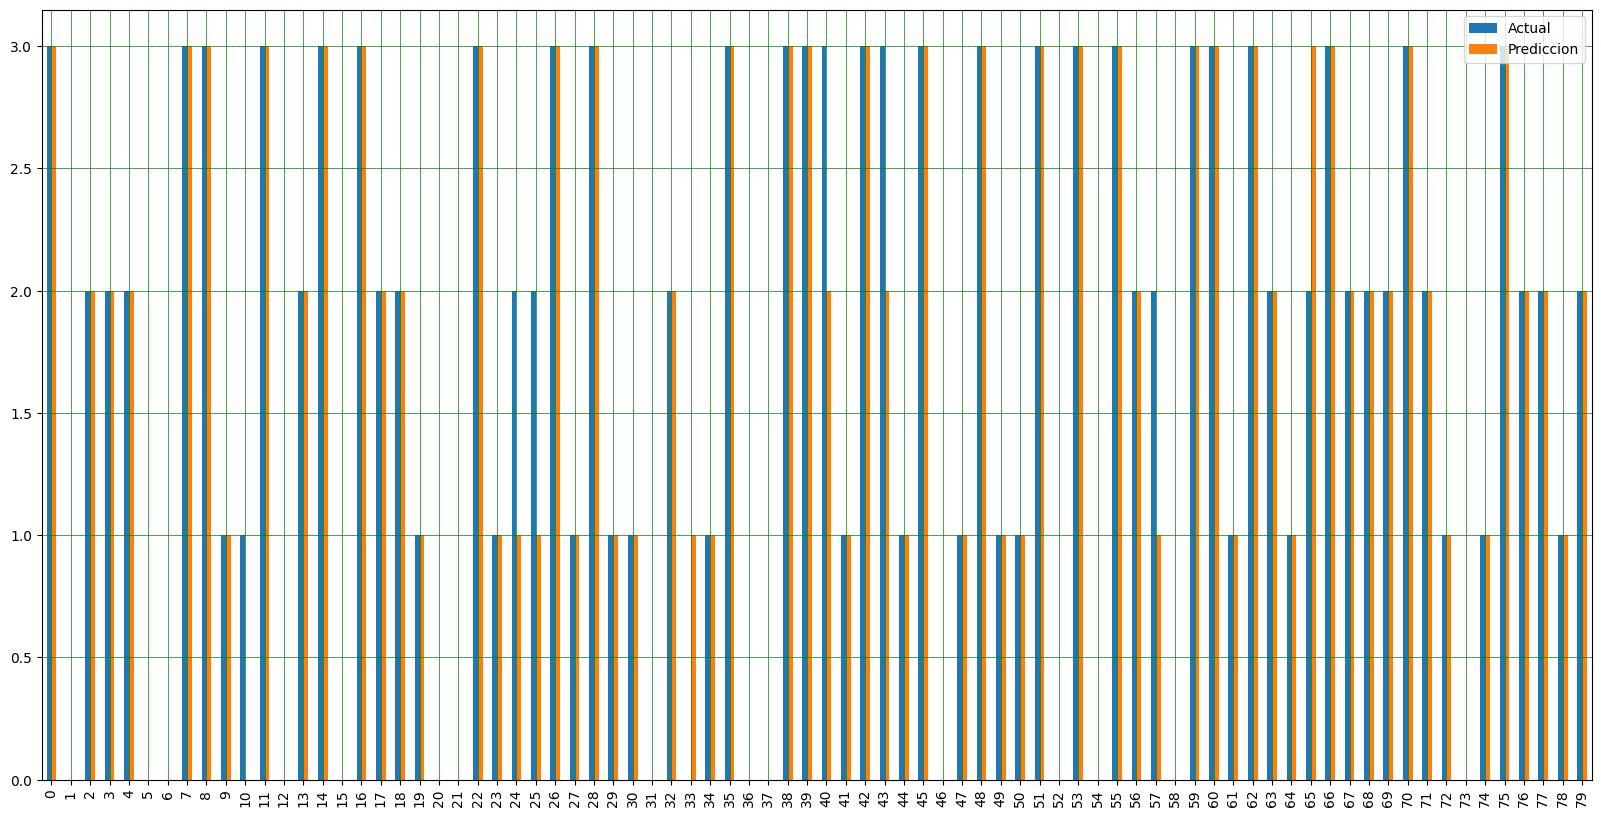

In [60]:
algoPrediccion.graficoComparativoBarras()

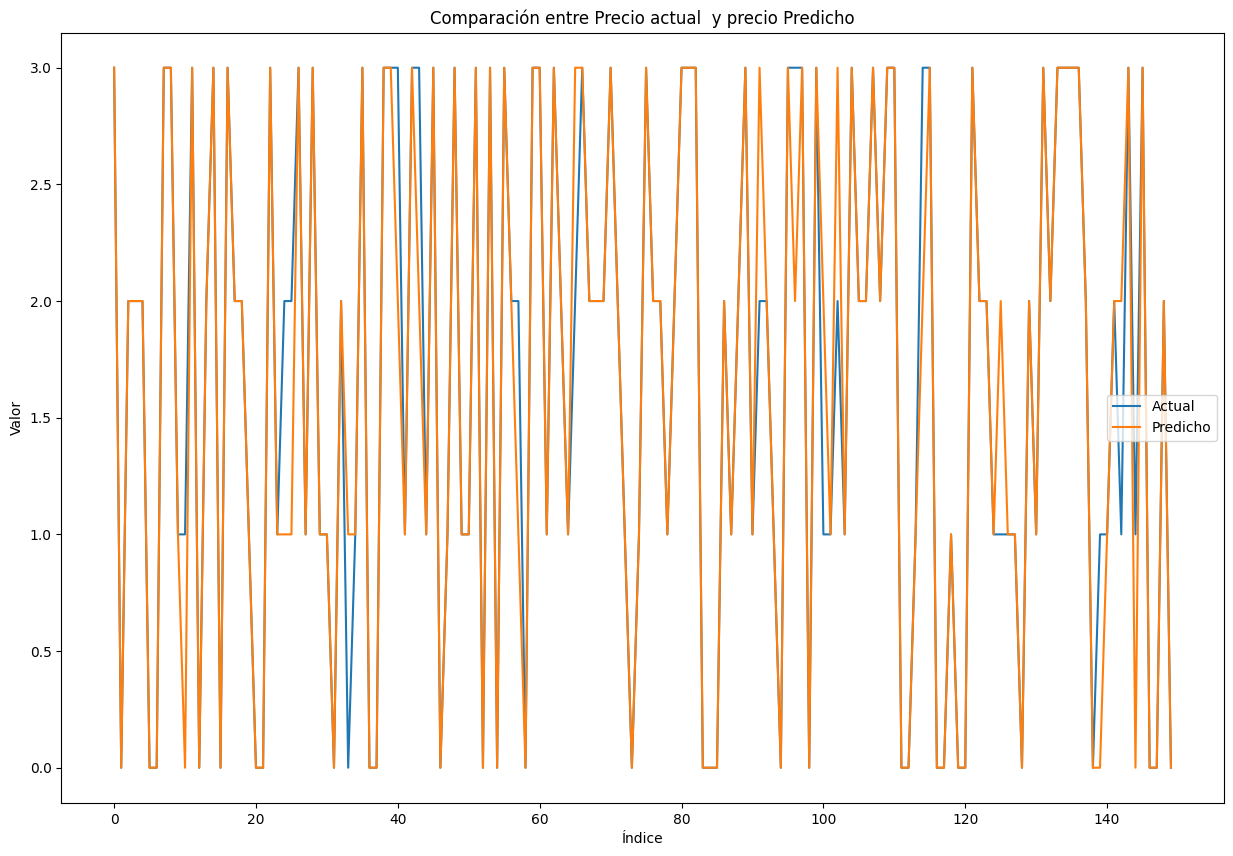

In [61]:
algoPrediccion.graficoComparativoLineas()

[[ 88   7   0   0]
 [  7  77   8   0]
 [  0  12  77  10]
 [  0   0   9 105]]


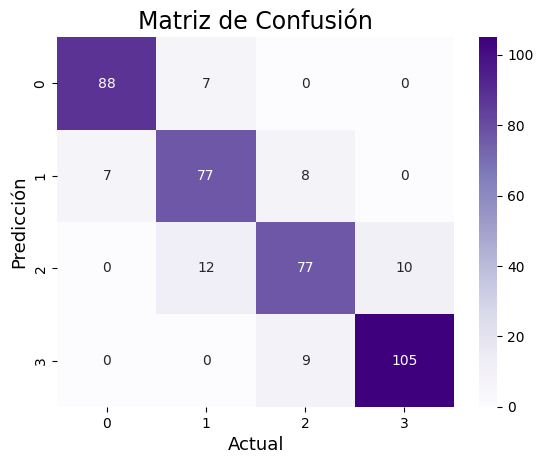

In [62]:
algoPrediccion.graficoMatrizDeConfusion()

In [63]:
algoPrediccion.metricas()

              precision    recall  f1-score   support

           0     0.9263    0.9263    0.9263        95
           1     0.8021    0.8370    0.8191        92
           2     0.8191    0.7778    0.7979        99
           3     0.9130    0.9211    0.9170       114

    accuracy                         0.8675       400
   macro avg     0.8651    0.8655    0.8651       400
weighted avg     0.8674    0.8675    0.8672       400



Aca podemos ver que logramos una efectividad del 86,7% . No es el mejor resultado que obtuvimos hasta ahora pero aun asi el algoritmo puede realizar predicciones correctamente. Podriamos mejorar los resultados quizas realizando una fuerte limpieza o correccion de datos aquellos celulares con un rango de precio ya sea 1 o 2. <br> <br>

Hasta ahora el algoritmos de regresion logistica  es la que menor inconvenientes tiene  para predecir correctamente los rango de precios de celulares 1 y 2 

### Predicciones con el dataset "limpiado" (Arboles de desicion) 

In [64]:
df_limpio = pd.DataFrame(pd.read_csv('mobile_price_limpiado.csv'))

In [65]:

from sklearn.tree import DecisionTreeClassifier
algoPrediccion2 = prediccion.ClasificacionModelo(df_limpio)
algoPrediccion2.clasificador =   DecisionTreeClassifier(criterion = "entropy", random_state = 20) 

In [66]:
algoPrediccion2.realizarEntrenamientoCompleto('price_range')
algoPrediccion2.metricas()

shape X_train (1408, 17)
shape X_test (353, 17)
shape y_train (1408, 1)
shape y_test (353, 1)
              precision    recall  f1-score   support

           0     0.9158    0.8969    0.9062        97
           1     0.8000    0.7835    0.7917        97
           2     0.6923    0.7778    0.7326        81
           3     0.8750    0.8077    0.8400        78

    accuracy                         0.8187       353
   macro avg     0.8208    0.8165    0.8176       353
weighted avg     0.8237    0.8187    0.8203       353



La historia aca se repite. Se empeora el rendimiento con el dataset limpiado

<hr><hr>